# Bài ôn tập buổi 7: 
# Bài 1: international-airline-passengers
- Cung cấp tập tin international-airline-passengers.csv (the number of international-airline-passengers (in thousands , from 1949-01 to 1960-12)
- Đọc dữ liệu từ tập tin, in dữ liệu
- Chuyển dữ liệu này thành Time Series object => in Time Series object
- Vẽ Time Series object vừa tạo. Nhận xét.
- Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn
- Dự đoán số lượng hành khách cho 12 tháng tiếp theo

In [1]:
passenger_data = read.csv("../Data/international-airline-passengers.csv")

In [2]:
head(passenger_data)

,Month,passengers_in_thousands
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


In [3]:
ts.passenger_data = ts(passenger_data$passengers_in_thousands, frequency = 12, start = c(1949, 1))

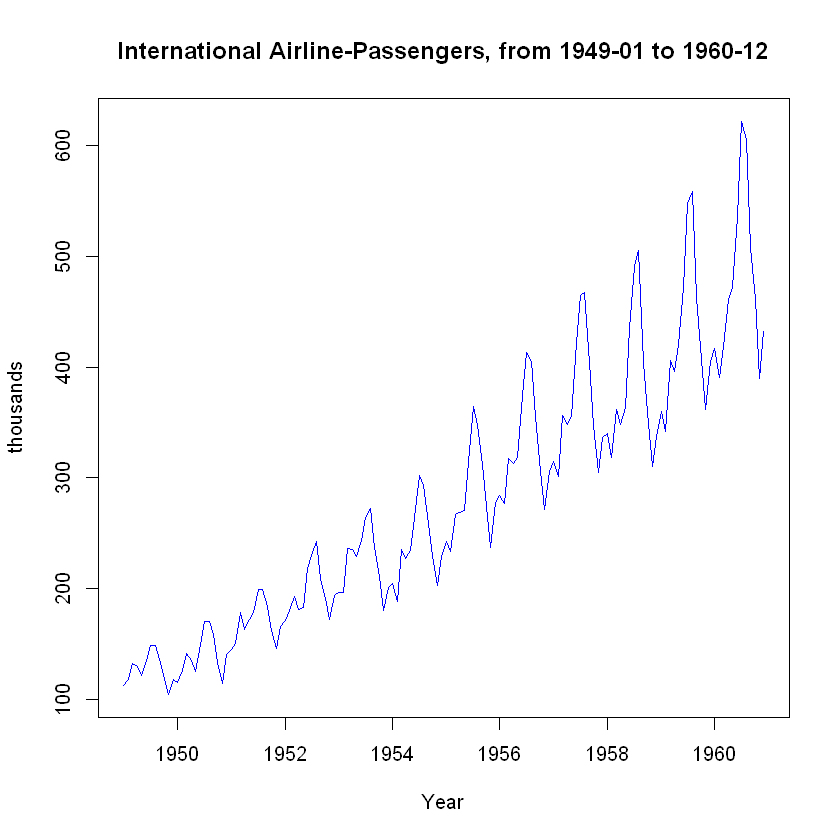

In [5]:
plot.ts(ts.passenger_data, main = "International Airline-Passengers, from 1949-01 to 1960-12", ylab = "thousands", xlab = "Year", col = "Blue")

In [19]:
comp = decompose(ts.passenger_data)
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


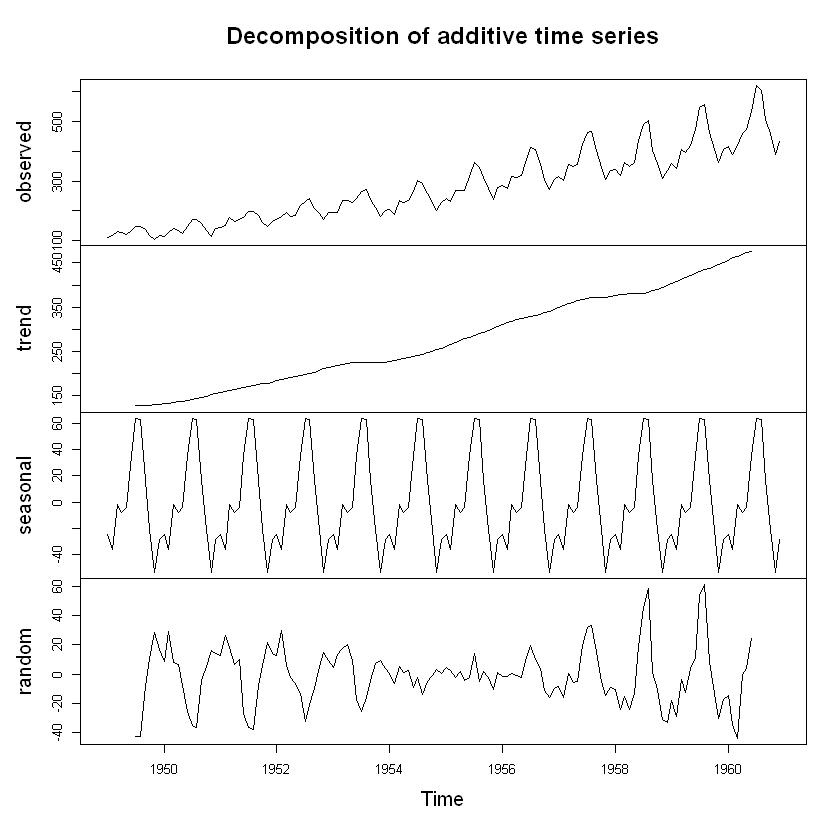

In [20]:
plot(comp)

In [6]:
library("forecast")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
forecast.next_12_months = HoltWinters(x = ts.passenger_data)

In [8]:
forecast.next_12_months_data = forecast(forecast.next_12_months, h = 12)

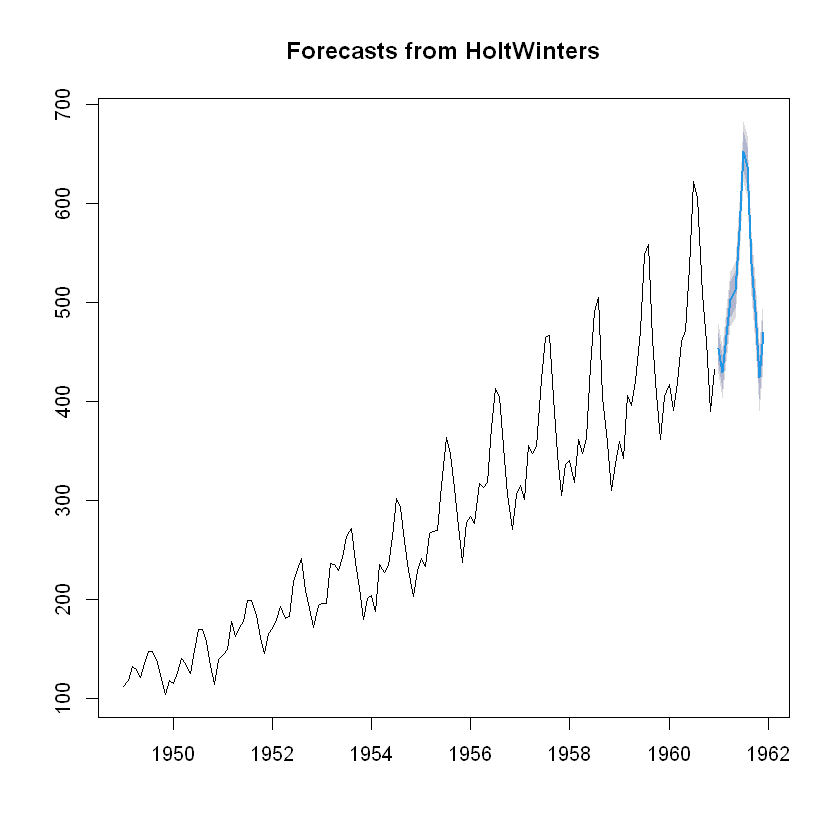

In [9]:
plot(forecast(forecast.next_12_months_data))

## Bài 2:
#### Sinh viên nam tại một trường đại học X ở Việt Nam có chiều cao trung bình là 164cm. Các chiều cao thường được phân phối, với độ lệch chuẩn là 6cm. Cho biết giá trị ở phân vị thứ [99] của data normal.
- Chọn loại phân phối. Hãy tạo ra 1000 mẫu ngẫu nhiên theo mô tả trên
- Vẽ histogram quan sát. 
- Cho biết giá trị ở phân vị thứ [99] của bộ mẫu.
- Nếu chiều cao của SV nam là 174cm thì xác suất là bao nhiêu?
- Cho biết tỷ lệ sinh viên nam cao từ 174cm trở lên.

In [10]:
sample = rnorm(1000, mean = 164, sd = 6)

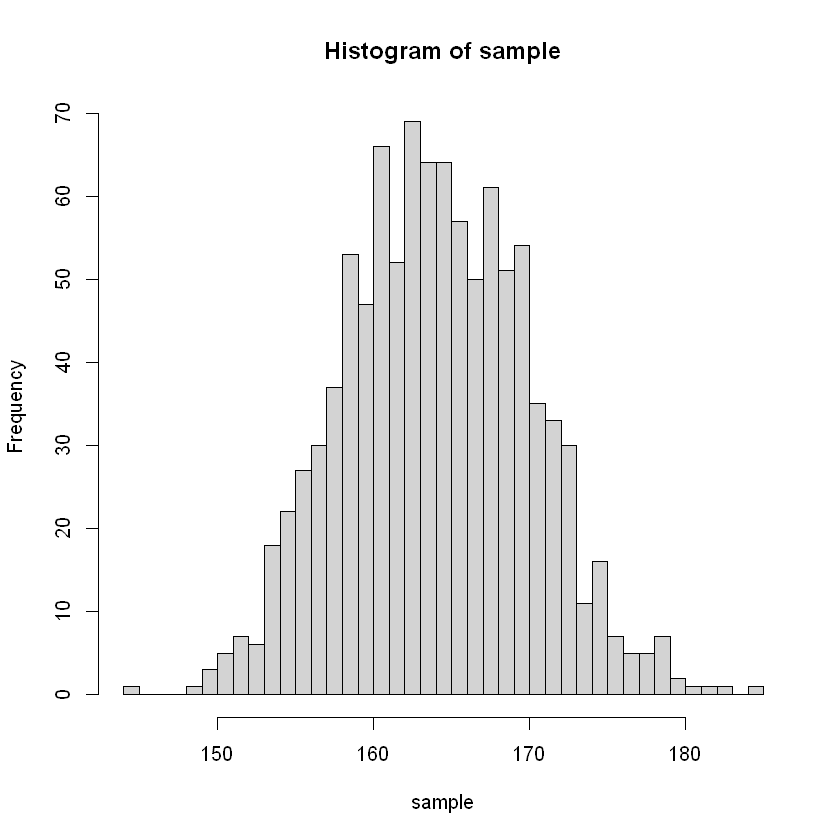

In [11]:
hist(sample, breaks = 50)

In [12]:
quantile(sample, c(.99))

99% 
178.4329

In [15]:
print("Probability of height = 174 cm")
print(dnorm(174, mean = 164, sd = 6))

[1] "Probability of height = 174 cm"
[1] 0.01657952


In [17]:
print("Probability of height more than 174 cm")
rs = pnorm(174, mean = 164, sd = 6, lower.tail = FALSE)
print(rs)

[1] "Probability of height more than 174 cm"
[1] 0.04779035
